# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [1]:
from __future__ import print_function, division
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from operator import itemgetter
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
DEC = 3

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

In [2]:
# Import the data
train_A = pd.read_csv('datasets/train_images_partA.csv')
valid_A = pd.read_csv('datasets/valid_images_partA.csv')

### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

In [3]:
# Display first 10 training instances
train_A.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

In [4]:
# Create list of attributes
attribute_names = list(train_A.columns.values)
print(attribute_names)

['imgId', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20', 'dim21', 'dim22', 'dim23', 'dim24', 'dim25', 'dim26', 'dim27', 'dim28', 'dim29', 'dim30', 'dim31', 'dim32', 'dim33', 'dim34', 'dim35', 'dim36', 'dim37', 'dim38', 'dim39', 'dim40', 'dim41', 'dim42', 'dim43', 'dim44', 'dim45', 'dim46', 'dim47', 'dim48', 'dim49', 'dim50', 'dim51', 'dim52', 'dim53', 'dim54', 'dim55', 'dim56', 'dim57', 'dim58', 'dim59', 'dim60', 'dim61', 'dim62', 'dim63', 'dim64', 'dim65', 'dim66', 'dim67', 'dim68', 'dim69', 'dim70', 'dim71', 'dim72', 'dim73', 'dim74', 'dim75', 'dim76', 'dim77', 'dim78', 'dim79', 'dim80', 'dim81', 'dim82', 'dim83', 'dim84', 'dim85', 'dim86', 'dim87', 'dim88', 'dim89', 'dim90', 'dim91', 'dim92', 'dim93', 'dim94', 'dim95', 'dim96', 'dim97', 'dim98', 'dim99', 'dim100', 'dim101', 'dim102', 'dim103', 'dim104', 'dim105', 'dim106', 'dim107', 'dim108', 'dim109', 'dim110'

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

In [5]:
# Setup training data
X_tr = train_A.copy().drop(attribute_names[-19:], axis=1).drop('imgId', axis=1)
y_tr = train_A.copy()['is_person']
# Setup validation data
X_val = valid_A.copy().drop(attribute_names[-19:], axis=1).drop('imgId', axis=1)
y_val = valid_A.copy()['is_person']
print('X_tr:', X_tr.shape)
print('y_tr:', y_tr.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)

X_tr: (2093, 500)
y_tr: (2093L,)
X_val: (1113, 500)
y_val: (1113L,)


### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

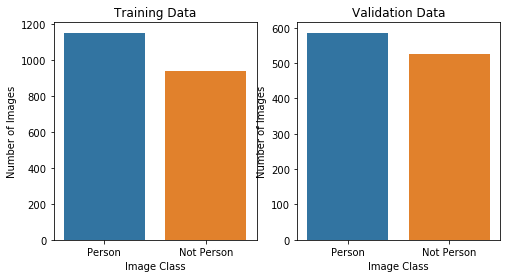

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(x=y_tr, ax=ax1)
sns.countplot(x=y_val, ax=ax2)
ax1.set_title('Training Data')
ax2.set_title('Validation Data')
ax1.set_xticklabels(['Person', 'Not Person'])
ax2.set_xticklabels(['Person', 'Not Person'])
ax1.set_xlabel('Image Class')# Your code goes here
ax2.set_xlabel('Image Class')
ax1.set_ylabel('Number of Images')
ax2.set_ylabel('Number of Images')
plt.show()

### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

#### Answer:
A simple baseline classifier is just one that predicts the most common class every time. It's a good choice because any classifier that does worse than this should definitely not be used. It's a simple algorithm to implement yet achieves a relatively good accuracy of 52.7% on the test dataset.

In [7]:
total_data_points = y_tr.shape[0]
num_person = np.sum(y_tr)
num_not_person = total_data_points - num_person
most_common_class = np.argmax([num_not_person, num_person])
baseline_accuracy = (most_common_class == y_val).sum()/y_val.shape[0]
print('Baseline Accuracy:', round(baseline_accuracy*100, DEC),"%")

Baseline Accuracy: 52.65 %


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

In [8]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X=X_tr, y=y_tr)
lr_pred = lr.predict(X_val)
accuracy_training = (lr.predict(X_tr) == y_tr).sum()/y_tr.shape[0]
accuracy_validation = (lr_pred == y_val).sum()/y_val.shape[0]
print('Accuracy Training: {}%\r\nAccuracy Validation: {}%'.format(round(accuracy_training*100, DEC), round(accuracy_validation*100, DEC)))

Accuracy Training: 55.088%
Accuracy Validation: 52.65%


#### Answer
The accuracy of the logistic regression on the validation set is 52.7%, which is not any better than the baseline classifier. Logistic regression can be heavily affected by outliers or high standard deviation, so given that the data hasn't been pre-processed at all this may be contributing to the low classification rate.

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations for each column in your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [9]:
data_mean = np.mean(X_tr, axis=0)
data_stdDev = np.std(X_tr, axis=0)
print('Mean first 5 features: {}'.format(np.round(data_mean[:5].values, 4)))
print('Standard Deviation first 5 features: {}'.format(np.round(data_stdDev[:5].values, 4)))

Mean first 5 features: [ 0.0018  0.0008  0.0043  0.0019  0.0023]
Standard Deviation first 5 features: [ 0.0012  0.0014  0.0037  0.0013  0.0016]


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

In [10]:
sc = StandardScaler()
sc = sc.fit(X_tr)
transf_x_tr = sc.transform(X_tr)
transf_x_val = sc.transform(X_val)
data_mean_transf = np.mean(transf_x_tr, axis=0)
data_stdDev_transf = np.std(transf_x_val, axis=0)
print('Mean first 5 features: {}'.format(data_mean_transf[:5]))
print('Standard Deviation first 5 features: {}'.format(np.round(data_stdDev_transf[:5], DEC)))

Mean first 5 features: [ -3.39485301e-17  -2.20665446e-17   2.44429417e-16   1.42583827e-16
  -5.77125012e-17]
Standard Deviation first 5 features: [ 1.013  0.97   1.049  1.057  0.975]


#### Answer:
The answers are about what I would expect as each mean is very nearly 0 and the standard deviations are all very close to 1. The training set is used to standardize the data since it's a large dataset that we consider representative of the rest of the data.

### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [11]:
lr_transf = LogisticRegression(solver='lbfgs')
lr_transf = lr_transf.fit(transf_x_tr, y_tr)
lr_transf_pred = lr_transf.predict(transf_x_val)
accuracy_training = (lr.predict(transf_x_tr) == y_tr).sum()/y_tr.shape[0]
accuracy_validation = (lr_transf_pred == y_val).sum()/y_val.shape[0]
print('Accuracy Training: {}%\r\nAccuracy Validation: {}%'.format(round(accuracy_training*100, 2), round(accuracy_validation*100, DEC)))

Accuracy Training: 65.12%
Accuracy Validation: 64.331%


#### Answer:
The logistic regression classifier performs significantly better than the baseline classifier after the data has been standardized. This fixes the problem seen in the last logistic regression since now there are no no excessively large values.

### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

In [12]:
kf = KFold(n_splits=3, shuffle=True, random_state=0)
i = 0
fold_test_size = np.zeros(3)
for train, test in kf.split(transf_x_tr):
    fold_test_size[i] = test.shape[0]
    i+=1
print('Test size per fold:', fold_test_size)

Test size per fold: [ 698.  698.  697.]


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [13]:
search_space_c = np.logspace(-5, 5, num=20)
accuracy_values = np.zeros((3, search_space_c.shape[0]))
for i in range(search_space_c.shape[0]):
    lr_cv = LogisticRegression(solver='lbfgs', C=search_space_c[i])
    current_fold_num = 0
    for train, test in kf.split(transf_x_tr):
        lr_cv = lr_cv.fit(transf_x_tr[train], y_tr[train])
        pred = lr_cv.predict(transf_x_tr[test])
        accuracy = (pred == y_tr[test]).sum()/y_tr[test].shape[0]
        accuracy_values[current_fold_num, i] = accuracy
        current_fold_num += 1
print(np.round(accuracy_values, DEC))

[[ 0.573  0.629  0.668  0.672  0.688  0.696  0.675  0.67   0.653  0.659
   0.659  0.653  0.649  0.646  0.646  0.649  0.646  0.646  0.649  0.649]
 [ 0.546  0.632  0.695  0.719  0.729  0.735  0.702  0.675  0.655  0.636
   0.632  0.633  0.626  0.628  0.628  0.626  0.626  0.626  0.628  0.626]
 [ 0.548  0.636  0.643  0.656  0.68   0.7    0.681  0.67   0.663  0.644
   0.633  0.626  0.624  0.624  0.624  0.624  0.624  0.624  0.624  0.624]]


# ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

[ 0.556  0.632  0.668  0.682  0.699  0.71   0.686  0.672  0.657  0.646
  0.641  0.637  0.633  0.633  0.633  0.633  0.632  0.632  0.634  0.633]


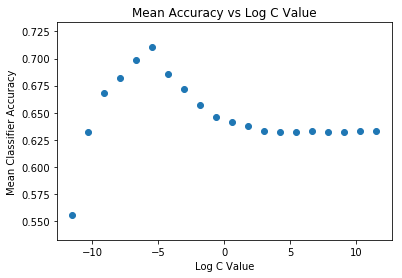

In [14]:
fold_mean = np.mean(accuracy_values, axis=0)
plt.scatter(np.log(search_space_c), fold_mean)
plt.xlabel('Log C Value')
plt.ylabel('Mean Classifier Accuracy')
plt.title('Mean Accuracy vs Log C Value')
print(np.round(fold_mean, DEC))

### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [15]:
optimal_c_index = np.argmax(fold_mean)
optimal_c_value = search_space_c[optimal_c_index]
print("Optimal C Value: {}".format(round(optimal_c_value, DEC+1)))
# Train a new logistic regression
optimal_lr = LogisticRegression(solver='lbfgs', C=optimal_c_value)
optimal_lr = optimal_lr.fit(transf_x_tr, y_tr)
pred_optimal_lr = optimal_lr.predict(transf_x_val)
accuracy = (pred_optimal_lr == y_val).sum()/y_val.shape[0]
print("Accuracy: {}%".format(round(accuracy*100, DEC)))

Optimal C Value: 0.0043
Accuracy: 69.632%


### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

In [16]:
logistic_regression_cv = LogisticRegressionCV(solver='lbfgs', Cs=search_space_c, cv=kf)
logistic_regression_cv.fit(transf_x_tr, y_tr)
pred_lr_cv = optimal_lr.predict(transf_x_val)
print("C Value: {}".format(round(logistic_regression_cv.C_[0], 4)))
accuracy = (pred_lr_cv == y_val).sum()/y_val.shape[0]
print("Accuracy: {}%".format(round(accuracy*100, DEC)))

C Value: 0.0043
Accuracy: 69.632%


### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to the labs if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [17]:
transf_x_train, transf_x_test, y_train, y_test = train_test_split(transf_x_tr, y_tr, test_size=.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(transf_x_tr, y_tr)
pred_rf_training = rf_classifier.predict(transf_x_tr)
pred_rf = rf_classifier.predict(transf_x_val)
accuracy = (pred_rf == y_val).sum()/y_val.shape[0]
accuracy_tr = (pred_rf_training == y_tr).sum()/y_tr.shape[0]
print("Training Accuracy: {}%".format(accuracy_tr*100))
print("Accuracy: {}%".format(round(accuracy*100, DEC)))

Training Accuracy: 100.0%
Accuracy: 69.272%


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

#### Answer:
There is a huge discrepancy between the training and validation accuracies. This is not surprising since the way random forest trains is by perfectly fitting the training data. This would be different with a classifier such as Naive Bayes, which doesn't perfectly fit the training data, it simply makes an approximation.

### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [18]:
feature_importance = zip(attribute_names, rf_classifier.feature_importances_, )
feature_importance = sorted(feature_importance, key=itemgetter(1))[::-1]
top_50_features = feature_importance[:50]
print(top_50_features)

[('dim20', 0.0075719505701260965), ('dim50', 0.0075594322149745204), ('dim359', 0.0070315402883795704), ('dim3', 0.0061929705370030591), ('dim478', 0.0060540675045530276), ('dim75', 0.0060262086838827065), ('dim282', 0.0058105619577742519), ('dim460', 0.0056058489053563308), ('dim342', 0.0054513322650658197), ('dim397', 0.0048591610911170079), ('dim347', 0.0047832305242377221), ('dim73', 0.0047419278129818138), ('dim484', 0.0047160452789987159), ('dim355', 0.0047022181382774964), ('dim329', 0.0046400953650727866), ('dim216', 0.0046058375787848471), ('dim262', 0.004577404157967961), ('dim221', 0.0042181328053523719), ('dim133', 0.0041313654581943008), ('dim499', 0.0040637948024201979), ('dim273', 0.0040416252061222626), ('dim253', 0.0040019579222058243), ('dim205', 0.0038899958735214781), ('dim422', 0.0038673852895302475), ('dim346', 0.0038130599781742995), ('dim16', 0.0037277779229481956), ('dim325', 0.0037043236955780121), ('dim89', 0.003703172661177383), ('dim91', 0.00370079881012970

### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [19]:
# Create 3 SVMs
svm_linear = svm.LinearSVC()
svm_radial_basis = svm.SVC(kernel='rbf')
svm_polynomial = svm.SVC(kernel='poly')
# Train the SVMs
svm_linear.fit(transf_x_train, y_train)
svm_radial_basis.fit(transf_x_train, y_train)
svm_polynomial.fit(transf_x_train, y_train)
# Calculate accuracy
svm_linear_accuracy_train = (svm_linear.predict(transf_x_test) == y_test).sum()/y_test.shape[0] * 100
svm_linear_accuracy_val = (svm_linear.predict(transf_x_val) == y_val).sum()/y_val.shape[0] * 100
svm_radial_basis_accuracy_train = (svm_radial_basis.predict(transf_x_test) == y_test).sum()/y_test.shape[0] * 100
svm_radial_basis_accuracy_val = (svm_radial_basis.predict(transf_x_val) == y_val).sum()/y_val.shape[0] * 100
svm_polynomial_accuracy_train = (svm_polynomial.predict(transf_x_test) == y_test).sum()/y_test.shape[0] * 100
svm_polynomial_accuracy_val = (svm_polynomial.predict(transf_x_val) == y_val).sum()/y_val.shape[0] * 100
# Display accuracy for each classifier
print("Training Accuracy: {}% Testing Accuracy: {}% - Linear".format(round(svm_linear_accuracy_train, DEC), round(svm_linear_accuracy_val, DEC)))
print("Training Accuracy: {}% Testing Accuracy: {}% - Radial Basis".format(svm_radial_basis_accuracy_train, round(svm_radial_basis_accuracy_val, DEC)))
print("Training Accuracy: {}% Testing Accuracy: {}% - Polynomial".format(round(svm_polynomial_accuracy_train, DEC), round(svm_polynomial_accuracy_val, DEC)))

Training Accuracy: 64.678% Testing Accuracy: 64.331% - Linear
Training Accuracy: 71.5990453461% Testing Accuracy: 71.968% - Radial Basis
Training Accuracy: 71.122% Testing Accuracy: 69.901% - Polynomial


### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [20]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

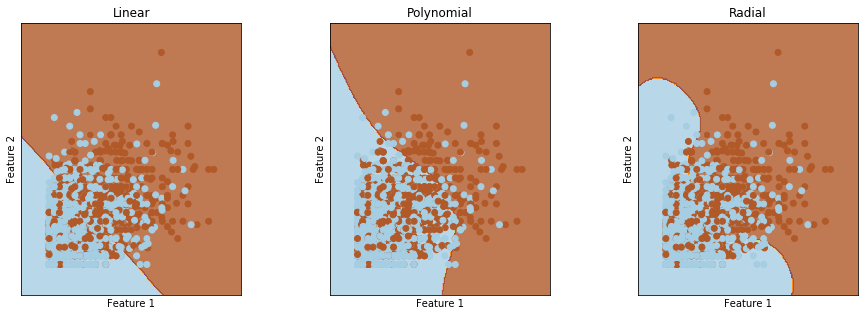

In [21]:
select_x_train = transf_x_tr[:, [20, 75]]
select_x_val = transf_x_val[:, [20, 75]]
# y_tr = y_tr.astype(float)
# Create 3 SVMs
select_svm_linear = svm.LinearSVC()
select_svm_radial_basis = svm.SVC(kernel='rbf')
select_svm_polynomial = svm.SVC(kernel='poly')
# Train the SVMs
select_svm_linear.fit(select_x_train, y_tr)
select_svm_radial_basis.fit(select_x_train, y_tr)
select_svm_polynomial.fit(select_x_train, y_tr)
titles = ['Linear', 'Polynomial', 'Radial']
show_svc_decision_boundaries([select_svm_linear, select_svm_polynomial, select_svm_radial_basis], select_x_train, titles)

#### Answer:
The shape of the boundaries are representative of the function that is used to define them and are able to classify. The linear regression is able to only draw a linear decision boundary and hence can't necessarily accurately reflect the data that it is trying to fit (as it's not easily linearly separable). The other functions are able to create more complex decision boundaries (with radial basis being the most complex) giving them higher precision.

### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

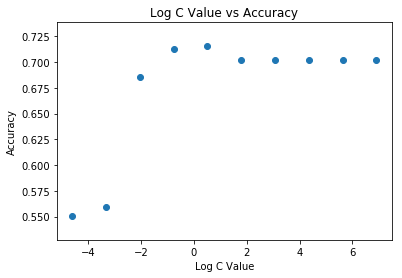

Accuracy Test: 97.468%
Accuracy Val: 72.776%


In [22]:
c_range = np.logspace(-2, 3, 10)
mean_accuracy_values = np.zeros(c_range.shape[0])
for i in range(c_range.shape[0]):
    rbf_classifier = svm.SVC(kernel='rbf', gamma='auto', C=c_range[i])
    current_fold_num = 0
    for train, test in kf.split(transf_x_tr):
        rbf_classifier = rbf_classifier.fit(transf_x_tr[train], y_tr[train])
        pred = rbf_classifier.predict(transf_x_tr[test])
        accuracy = (pred == y_tr[test]).sum()/y_tr[test].shape[0]
        mean_accuracy_values[i] += accuracy
        current_fold_num += 1
mean_accuracy_values = mean_accuracy_values/3
plt.scatter(np.log(c_range), mean_accuracy_values)
plt.title('Log C Value vs Accuracy')
plt.xlabel('Log C Value')
plt.ylabel('Accuracy')
plt.show()
optimal_c = c_range[np.argmax(mean_accuracy_values)]
rbf_optimal = svm.SVC(kernel='rbf', gamma='auto', C=optimal_c)
rbf_optimal.fit(transf_x_tr, y_tr)
pred = rbf_optimal.predict(transf_x_tr)
accuracy_train = (pred == y_tr).sum()/y_tr.shape[0]
print("Accuracy Test: {}%".format(round(accuracy_train*100, DEC)))
pred = rbf_optimal.predict(transf_x_val)
accuracy_val = (pred == y_val).sum()/y_val.shape[0]
print("Accuracy Val: {}%".format(round(accuracy_val*100, DEC)))

### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

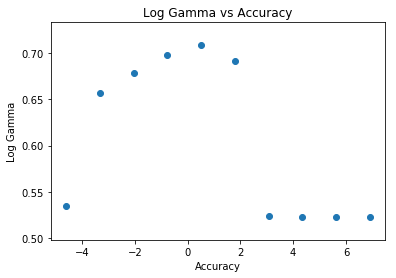

Accuracy Test: 0.891%
Accuracy Val: 0.727%


In [23]:
range_gamma = np.logspace(-5, 0, 10)
mean_accuracy_values = np.zeros(range_gamma.shape[0])
for i in range(range_gamma.shape[0]):
    rbf_classifier = svm.SVC(kernel='rbf', gamma=range_gamma[i], C=1)
    current_fold_num = 0
    for train, test in kf.split(transf_x_train):
        rbf_classifier = rbf_classifier.fit(transf_x_tr[train], y_tr[train])
        pred = rbf_classifier.predict(transf_x_tr[test])
        accuracy = (pred == y_tr[test]).sum()/y_tr[test].shape[0]
        mean_accuracy_values[i] += accuracy
        current_fold_num += 1
mean_accuracy_values = mean_accuracy_values/3
plt.scatter(np.log(c_range), mean_accuracy_values)
plt.title('Log Gamma vs Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Log Gamma')
plt.show()
optimal_gamma = range_gamma[np.argmax(mean_accuracy_values)]
rbf_optimal = svm.SVC(kernel='rbf', gamma=optimal_gamma, C=1.0)
rbf_optimal.fit(transf_x_tr, y_tr)
pred = rbf_optimal.predict(transf_x_tr)
accuracy_test = (pred == y_tr).sum()/y_tr.shape[0]
print("Accuracy Test: {}%".format(round(accuracy_test, DEC)))
pred = rbf_optimal.predict(transf_x_val)
accuracy_val = (pred == y_val).sum()/y_val.shape[0]
print("Accuracy Val: {}%".format(round(accuracy_val, DEC)))

### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

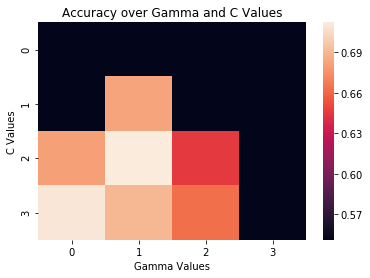

Test Accuracy: 83.469%
Val Accuracy: 72.147%


In [24]:
search_space_c = np.logspace(-2, 1, 4)
search_space_gamma = np.logspace(-4, -1, 4)
mean_accuracy = np.zeros((search_space_c.shape[0], search_space_gamma.shape[0]))
for i in range(search_space_c.shape[0]):
    for j in range(search_space_gamma.shape[0]):
        rbf_optimized = svm.SVC(kernel='rbf', C=search_space_c[i], gamma=search_space_gamma[j])
        for train, test in kf.split(transf_x_tr):
            rbf_optimized.fit(transf_x_tr[train], y_tr[train])
            pred = rbf_optimized.predict(transf_x_tr[test])
            accuracy = (pred == y_tr[test]).sum()/y_tr[test].shape[0]
            mean_accuracy[i, j] += accuracy
mean_accuracy = mean_accuracy/3
sns.heatmap(mean_accuracy)
plt.title('Accuracy over Gamma and C Values')
plt.xlabel('Gamma Values')
plt.ylabel('C Values')
plt.show()
# Calculate optimal
max_value = np.unravel_index(np.argmax(mean_accuracy), mean_accuracy.shape)
best_c = search_space_c[max_value[0]]
best_gamma = search_space_gamma[max_value[1]]
rbf_optimal = svm.SVC(kernel='rbf', C=best_c, gamma=best_gamma)
rbf_optimal.fit(transf_x_tr, y_tr)
pred_train = rbf_optimal.predict(transf_x_tr)
accuracy_train = (pred_train == y_tr).sum()/y_tr.shape[0]
pred_val = rbf_optimal.predict(transf_x_val)
accuracy_val = (pred_val == y_val).sum()/y_val.shape[0]
print("Test Accuracy: {}%".format(round(accuracy_train*100, DEC)))
print("Val Accuracy: {}%".format(round(accuracy_val*100, DEC)))
# TODO: Check Heatmap for Accuracy

### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

No, the accuracy is actually slightly lower. One issue with this system is that the search resolution is quite low so it might be difficult to find the actual optimal value.

### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

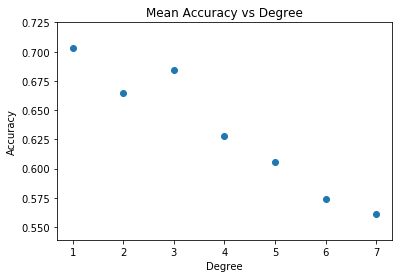

Training Accuracy: 78.356%
Validation Accuracy: 68.913%


In [25]:
search_space_degree = np.arange(1,8)
mean_accuracy = np.zeros(search_space_degree.shape[0])
for i in range(search_space_degree.shape[0]):
    poly_svm = svm.SVC(kernel='poly', degree=search_space_degree[i])
    for train, test in kf.split(transf_x_tr):
        poly_svm.fit(transf_x_tr[train], y_tr[train])
        pred = poly_svm.predict(transf_x_tr[test])
        accuracy = (pred == y_tr[test]).sum()/y_tr[test].shape[0]
        mean_accuracy[i] += accuracy
mean_accuracy = mean_accuracy/3
plt.scatter(search_space_degree, mean_accuracy)
plt.title('Mean Accuracy vs Degree')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.show()
poly_svm = svm.SVC(kernel='poly', degree=search_space_degree[np.argmax(mean_accuracy)])
poly_svm.fit(transf_x_tr, y_tr)
pred_training = poly_svm.predict(transf_x_tr)
accuracy_training = (pred_training == y_tr).sum()/y_tr.shape[0]
pred = poly_svm.predict(transf_x_val)
accuracy = (pred == y_val).sum()/y_val.shape[0]
print('Training Accuracy: {}%'.format(round(accuracy_training*100, DEC)))
print('Validation Accuracy: {}%'.format(round(accuracy*100, DEC)))

### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

Cross-validation is often much better as it provides access to the whole dataset for training rather than only a small subsection. The main disadvantage is that it is much less computationally efficient as the training algorithm needs to be run k times depending on the number of training folds.

### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [26]:
# Import the data
train_A2 = pd.read_csv('datasets/train_images_partA.csv')
valid_A2 = pd.read_csv('datasets/valid_images_partA.csv')
train_A2 = train_A2.drop('imgId', axis=1)
valid_A2 = valid_A2.drop('imgId', axis=1)
A2_train_x = train_A2.drop('is_person', axis=1)
A2_train_y = train_A2['is_person']
A2_val_x = valid_A2.drop('is_person', axis=1)
A2_val_y = valid_A2['is_person']
sc2 = StandardScaler()
sc2 = sc2.fit(A2_train_x)
A2_train_x_tr = sc2.transform(A2_train_x)
A2_val_x_tr = sc2.transform(A2_val_x)
rf = RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=31)
rf.fit(A2_train_x_tr, A2_train_y)
accuracy_train = rf.score(A2_train_x_tr, A2_train_y)
accuracy_val = rf.score(A2_val_x_tr, A2_val_y)
print("Training Accuracy: {}%".format(accuracy_train*100))
print("Validation Accuracy: {}%".format(accuracy_val*100))
attribute_name = A2_train_x.columns.values
feature_importance = zip(attribute_name, rf.feature_importances_, )
feature_importance = sorted(feature_importance, key=itemgetter(1))[::-1]
top_50_features = feature_importance[:50]
print(top_50_features)

Training Accuracy: 100.0%
Validation Accuracy: 71.1590296496%
[('is_cat', 0.0093786604641707457), ('is_bird', 0.0087309056175232311), ('dim21', 0.008030268242118669), ('dim51', 0.0059245937795918326), ('dim360', 0.005463270730147453), ('dim4', 0.0053254635730240014), ('dim76', 0.0052711094276990432), ('dim398', 0.0052542912934713882), ('dim283', 0.0049825214687269567), ('dim479', 0.0049417709169217588), ('dim263', 0.0047338405389478009), ('dim343', 0.0046091911270877816), ('dim423', 0.0044332941459177136), ('dim485', 0.0042446900093632139), ('dim254', 0.004188582305401224), ('dim461', 0.0041575039787235292), ('dim222', 0.0041343771358179392), ('dim356', 0.0039138875860249295), ('dim74', 0.0038603367481714335), ('dim288', 0.0038503656836912049), ('dim214', 0.0037915869326592007), ('dim348', 0.0037810959049539117), ('dim330', 0.003712548531421811), ('dim217', 0.0036834267865541752), ('dim483', 0.0036327747075583202), ('dim90', 0.0036258903666367714), ('dim274', 0.0035970303119618125), ('

#### Answer
The two best features are 'is_cat' and 'is_bird'. This is not surprising as they would rarely be seen at the same time as people. Almost nearly all of the birds features the animals in their natural environment, trees, where one is ulikely to find humans. Most of the images featuring cats seem to be closeups, again, not containing humans. The performance is moderately better than without the indicator variables. This makes sense since the two most important features were both not included in question 1.16, however with 500 feature vectors they're likely approximated by some of the other features (leading to a less significant performance gain.
Because we don't know what each of the features is (other than is_cat and is_bird) it's difficult to make use of them for anything else.

## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see the labs). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

### Answer
	 	 	
A neural network is a strong solution as it is able to extract patterns from complex data. Recently convolutional neural networks have been able to achieve impressive accuracy for the task of image recognition. Convolutional neural networks typically have a series of convolutional layers that iteratively extract more abstract features from the data. I operated under the assumption that our visual bag of words representation of the images could approximate the final convolutional layer of a neural network. Most convolutional neural nets use a series of fully connected layers at the end to draw predictions from the features found in a given image. Under the assumption that bag of visual words is a good approximation of these features feeding them into a multi-layer perceptron should yield similar performance.
I tried a series of network architectures ranging from small to large. Initially, using no hidden layers yielded poor performance. By increasing the size of the network I was slowly able to improve performance. I also tuned numerous hyperparameters with the hope of improving the performance. I decided to switch the activation function from the default, ReLU, to a tanh function. In this example many of the features could negatively correlate to the probability of is_person. Using ReLU as an activation function doesn’t add to ability to decrease a probability based on something being unlikely, making it an inferior choice to a tanh activation function in this case. 
After setting the activation function I tried to optimize the network architecture. After creating three hidden layers with around 700 neurons each I realized that randomly trying to build the network would not likely be fruitful. I decided to compare my architecture to a standard neural network architecture for image classification, ImageNet. In this architecture a series of convolutional layers feeds into 3 fully connected layers with size 4096, 4096 and 1000. I tried this exact architecture and it didn’t yield significantly better performance. However the last layer of the ImageNet architecture only has 256 features, whereas we have almost double that. In order to compensate for the extra features I decided to put add in a small layer that reduces the size of the input before the main network creating 4 hidden layers with dimensions 256, 4096, 4096, 1024.This structure didn’t improve performance in any way, so rather than trying to decrease the dimensionality of my data I increased the size of the neural network so that it was three layers of size 8000, 8000 and 2048. 
This structure yielded the best results of any that I tried. Although this neural network never yielded extremely high performance I theorize that this may be due to the features not being descriptive enough, or a failure to design a sufficient architecture. Although this solution never achieved particularly high performance I still believe that a neural network is the best strategy as it should have the power to approximate any other machine learning method given a large enough neural network. 


In [29]:
# Import Datasets
chal_train_data = pd.read_csv('datasets/train_images_partB.csv')
chal_val_data = pd.read_csv('datasets/valid_images_partB.csv')
chal_test_data = pd.read_csv('datasets/test_images_partB.csv')

# Split to isolate x and y
chal_train_x = chal_train_data.drop(['imgId'], axis=1).drop(attribute_names[-19:], axis=1)
chal_train_y = chal_train_data['is_person']
chal_val_x = chal_val_data.drop(['imgId'], axis=1).drop(attribute_names[-19:], axis=1)
chal_val_y = chal_val_data['is_person']
chal_test_x = chal_test_data.drop('is_person', axis=1)

# First Pre-process data
chal_sc = StandardScaler()
chal_sc = chal_sc.fit(chal_train_x)
chal_train_x = chal_sc.transform(chal_train_x)
# Test a neural network as a classifier
nn = MLPClassifier(hidden_layer_sizes=(8000, 8000, 2048), max_iter=10000, learning_rate_init=.0001, activation='tanh', random_state=10)
nn.fit(chal_train_x, chal_train_y)
accuracy_train = nn.score(chal_train_x, chal_train_y)
accuracy = nn.score(chal_val_x, chal_val_y)
print('Accuracy Train Neural Network: {}%'.format(accuracy_train*100))
print('Accuracy Neural Network: {}%'.format(accuracy*100))
log_loss_accuracy = log_loss(chal_val_y, nn.predict_proba(chal_val_x))
print('Log-loss Accuracy: {}'.format(log_loss_accuracy))

Accuracy Train Neural Network: 55.5134879319%
Accuracy Neural Network: 52.6504941599%
Log-loss Accuracy: 0.686981372376


In [33]:
test_images_partB_pred_proba = nn.predict_proba(chal_test_x)

In [34]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(test_images_partB_pred_proba) 

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)